<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/operanalyst/teoriegrafu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teorie grafů

## Matematický popis

$$G=(V,E)$$
$V$ je množina vrcholů, $E\subseteq\{\{x,y\}|x,y \in V, x \ne y\}$ je množina hran.

Rozlišujeme neorientované a orientované grafy.

## Grafické vyjádření

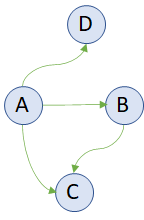

## Vyjádření ve formě incidenční matice

$$G_m=
\begin{pmatrix}
\times & 1 & 1 & 1 \\
0 & \times & 1 & 0 \\
0 & 0 & \times & 0 \\
0 & 0 & 0 & \times
\end{pmatrix}$$

Symboly $\times$ na diagonále matice představují nepřípustnost hrany, jejíž oba vrcholy jsou shodné (v některých grafech je toto možné). U existujících hran je uvedena hodnota 1, u neexistujících je uvedena hodnota 0. Řádky odpovídají vrcholům, ze kterých hrana vychází, sloupce odpovídají vrcholém, kde hrana končí.

### Vyjádření v programovacích jazycích

Vyjádření pomocí matice
```
G =[[0, 1, 1, 1], [0, 0, 1, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
```
Vyjádření pomocí dictionary
```
G = {
  'A': {'B': 1, 'C': 1, 'D': 1},
  'B': {'C': 1}
  }
```


## Ohodnocení hran

Velmi častým případem je matematický graf, ve kterém je ke každé hraně přiřazena hodnota. Datový typ obecně není omezen, často se ovšem předpokládá, že touto hodnotou je číslo.

Obdobně i k vrcholům muže být přiřazena hodnota.

## Hledání nejkratší cesty v grafu

Pro hledání nejkratší cesty v grafu je nutné mít jednotlivé hrany ohodnoceny číslem $f:V \to \mathbb{R}$ přičemž $f(v_i) \ge 0$. Předpokládá se, že délka žádné hrany není záporná.

Dijkstrův algoritmus

Mějme graf $G$, v němž hledáme nejkratší cestu. Řekněme, že $V$ je množina všech vrcholů grafu $G$ a&nbsp;množina $E$ obsahuje všechny hrany grafu $G$. Algoritmus pracuje tak, že si pro každý vrchol $v$ z&nbsp;$V$ pamatuje délku nejkratší cesty, kterou se k němu dá dostat. Označme tuto hodnotu jako $d[v]$. Na začátku mají všechny vrcholy $v$ hodnotu $d[v] = \infty$, kromě počátečního vrcholu $s$, který má $d[s]=0$. Nekonečno symbolizuje, že neznáme cestu k&nbsp;vrcholu.

Dále si algoritmus udržuje množiny $Z$ a&nbsp;$N$, kde $Z$ obsahuje už navštívené vrcholy a $N$ dosud nenavštívené. Algoritmus pracuje v&nbsp;cyklu tak dlouho, dokud $N$ není prázdná. V&nbsp;každém průchodu cyklu se přidá jeden vrchol $v_{min}$ z&nbsp;$N$ do&nbsp;$Z$, a&nbsp;to takový, který má nejmenší hodnotu $d[v]$ ze&nbsp;všech vrcholů $v$ z&nbsp;$N$.

Pro každý vrchol $u$, do&nbsp;kterého vede hrana (označme její délku jako $l(v_{min},u)$) z $v_{min}$, se provede následující operace: pokud $(d[v_{min}] + l(v_{min},u)) < d[u]$, pak do&nbsp;$d[u]$ přiřaď hodnotu $d[v_{min}] + l(v_{min},u)$, jinak neprováděj nic.

Když algoritmus skončí, pro každý vrchol $v$ z&nbsp;$V$ je délka jeho nejkratší cesty od počátečního vrcholu $s$ uložena v&nbsp;$d[v]$.

Převzato z [Wiki](https://cs.wikipedia.org/wiki/Dijkstr%C5%AFv_algoritmus).

### Výpočet s využitím Python

In [1]:
import networkx as nx

In [2]:
G = nx.Graph()
G.add_edge('A', 'B', weight=4)
G.add_edge('B', 'D', weight=2)
G.add_edge('A', 'C', weight=3)
G.add_edge('C', 'D', weight=4)
path = nx.shortest_path(G, 'A', 'D', weight='weight')
print(path)

['A', 'B', 'D']
